<a href="https://colab.research.google.com/github/tej-mahender/Crop_Recommendation/blob/main/cropRecommendation_yieldPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Crop Recommendation model**


# **Importing Libraries and Dataset**

In [ ]:
# Importing required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing dataset
crop = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

# Data Pre - Processing

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
# Renamed column 'label' as 'crop'
crop.rename(columns = {'label':'crop'}, inplace = True)
crop

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
# Checking missing values of the dataset in each column
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
crop,0


There are no missing values, so no need to drop any values

In [ ]:
crop.duplicated().sum()

0

In [ ]:
# Check for missing and duplicate values
print("Missing Values: ", crop.isnull().sum().sum())
print("Duplicate Entries: ", crop.duplicated().sum())

Missing Values:  0
Duplicate Entries:  0


In [ ]:
# Checking for unique values
for i in crop.columns:
    print("Column Name:", i.upper())
    print("No. of unique values: {}\n".format(crop[i].nunique()))
    # Checking if the column is categorical (object type)
    if crop[i].dtype == 'object':
        print('Unique values:', pd.unique(crop[i]))


Column Name: N
No. of unique values: 137

Column Name: P
No. of unique values: 117

Column Name: K
No. of unique values: 73

Column Name: TEMPERATURE
No. of unique values: 2200

Column Name: HUMIDITY
No. of unique values: 2200

Column Name: PH
No. of unique values: 2200

Column Name: RAINFALL
No. of unique values: 2200

Column Name: CROP
No. of unique values: 22

Unique values: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
crop['crop'].value_counts()

,count
crop,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [ ]:
# Encode categorical target variable
label_encoder = LabelEncoder()
crop['crop_encoded'] = label_encoder.fit_transform(crop['crop'])
y_encoded = crop['crop_encoded']

In [ ]:
# Create mapping of label names and encoded values
classes = pd.DataFrame({'label': label_encoder.classes_, 'encoded': range(len(label_encoder.classes_))})
classes.set_index('label', inplace=True)
print(classes)

             encoded
label               
apple              0
banana             1
blackgram          2
chickpea           3
coconut            4
coffee             5
cotton             6
grapes             7
jute               8
kidneybeans        9
lentil            10
maize             11
mango             12
mothbeans         13
mungbean          14
muskmelon         15
orange            16
papaya            17
pigeonpeas        18
pomegranate       19
rice              20
watermelon        21


In [ ]:
# Splitting data into features and target variable
x = crop.drop(columns=['crop','crop_encoded'])

In [ ]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y_encoded

,crop_encoded
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [ ]:
# Splitting data set - 25% test dataset and 75%

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1760, 7)
x_test : (440, 7)
y_train : (1760,)
y_test : (440,)


In [ ]:
# Scale Features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Comparing Algorithms

Logistic Regression  with accuracy : 0.9545454545454546


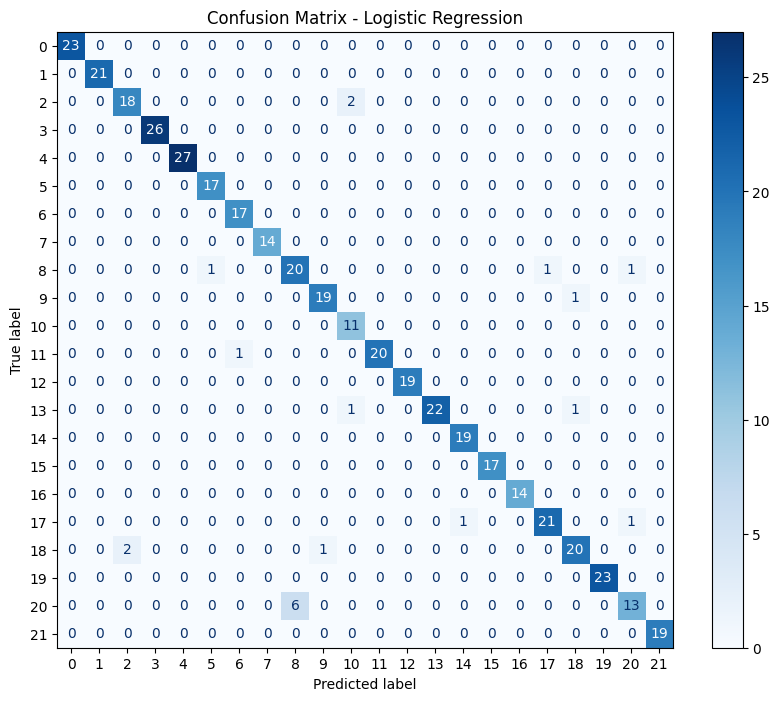

Naive Bayes  with accuracy : 0.9886363636363636


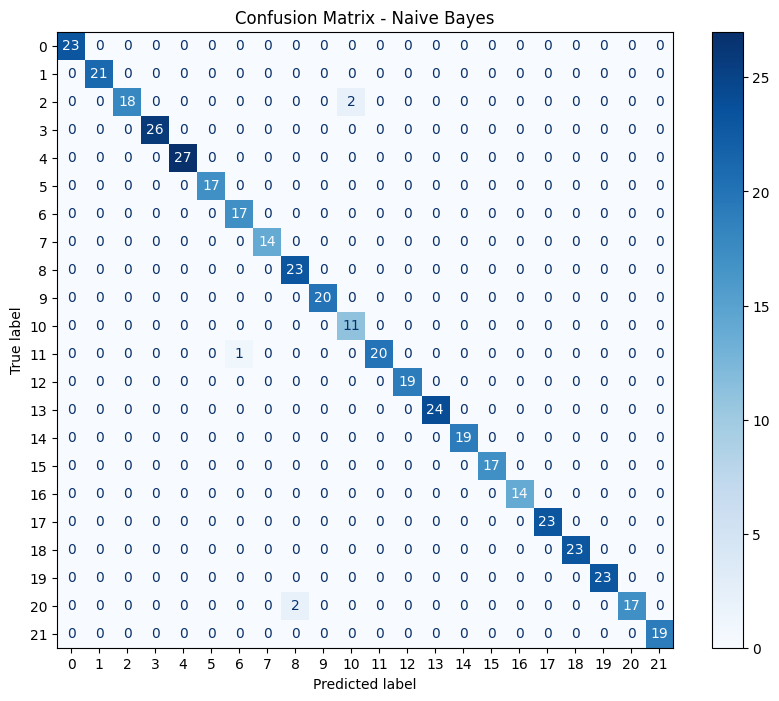

Support Vector Machine  with accuracy : 0.9590909090909091


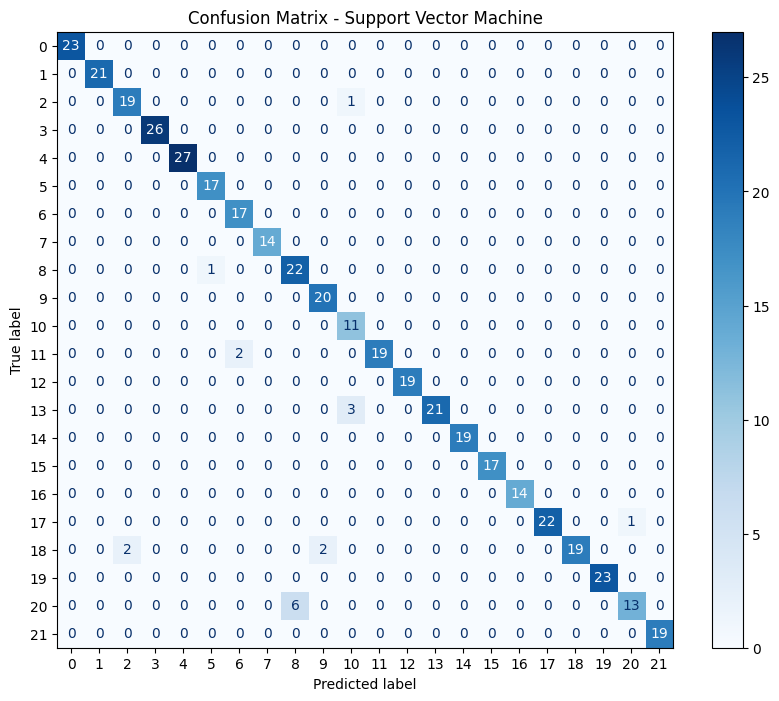

K-Nearest Neighbors  with accuracy : 0.9431818181818182


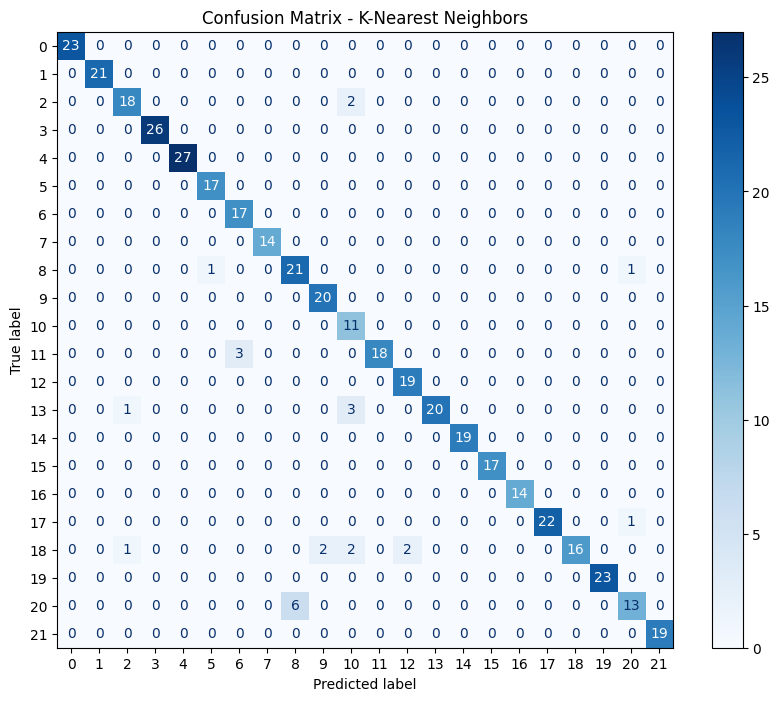

Decision Tree  with accuracy : 0.95


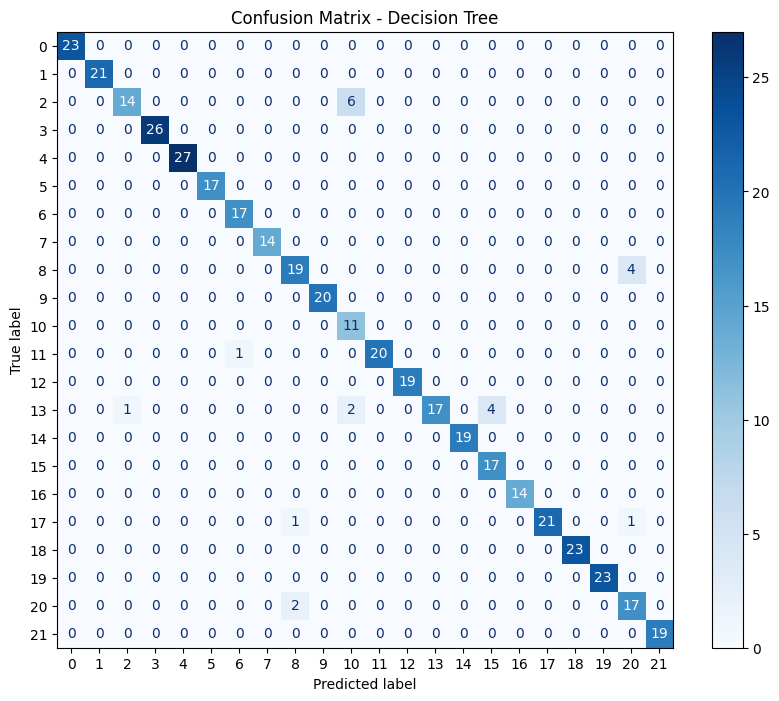

Random Forest  with accuracy : 0.9772727272727273


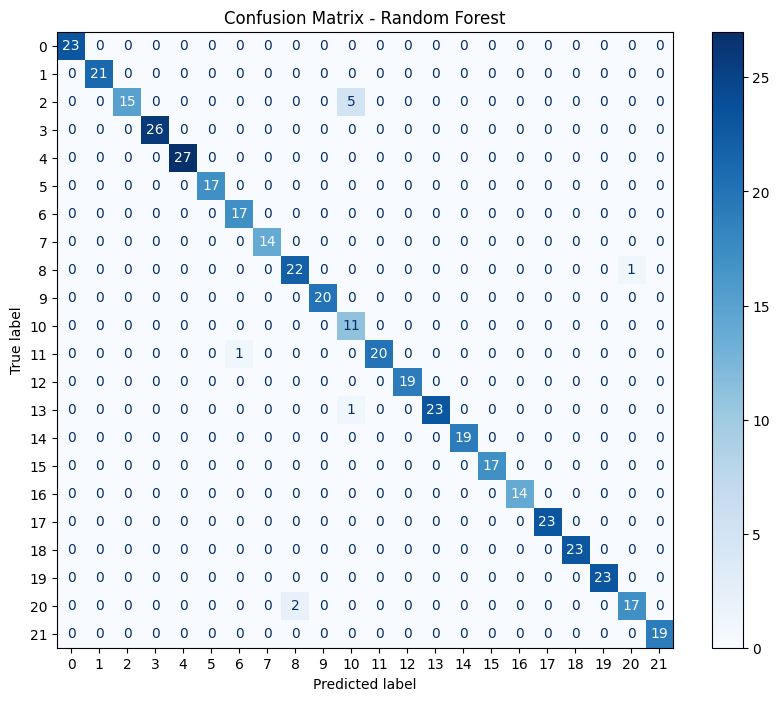

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

# Store accuracy results
accuracy_results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy  # Store accuracy
    print(f"{name}  with accuracy : {accuracy}")

    cm = confusion_matrix(y_test, y_pred)
 # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))  # Set figure size
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, ax=ax, cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    print("=" * 50)

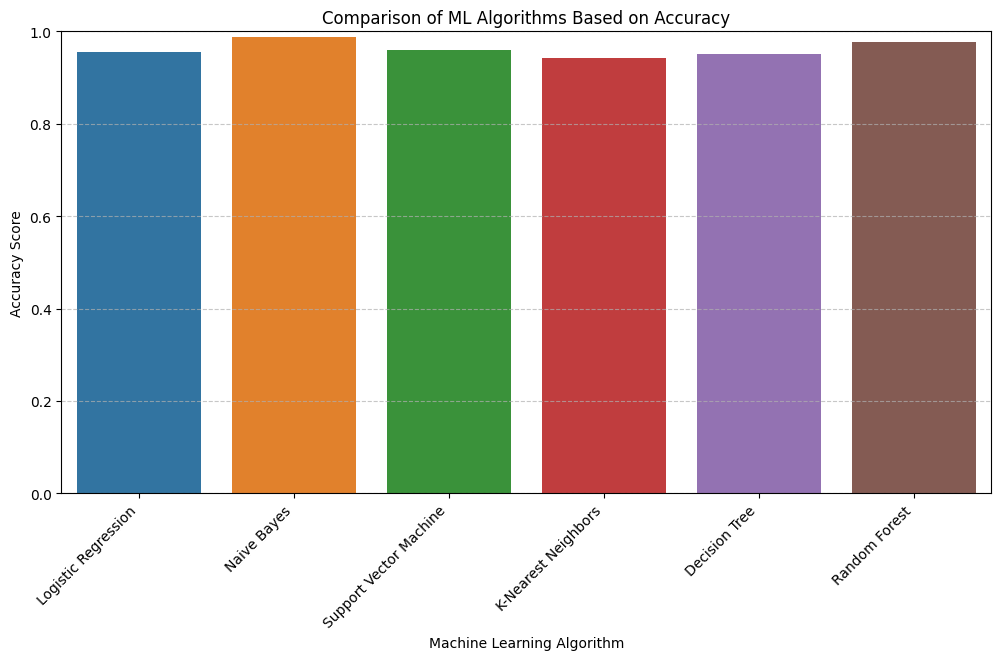

In [ ]:
# Create accuracy comparison DataFrame
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Algorithm', 'Accuracy'])

# Set figure size
plt.figure(figsize=(12, 6))

# Create horizontal bar chart with proper hue setting
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df, hue='Algorithm', dodge=False, legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Algorithm")
plt.title("Comparison of ML Algorithms Based on Accuracy")

# Set accuracy limits
plt.ylim(0, 1)  # Accuracy is between 0 and 1

# Add grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Random Forest has highest Acuuray, so we chose it as final model


✅ Final Model Accuracy (Random Forest): 0.9818

📊 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.80      0.89        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.90      0.95        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      o

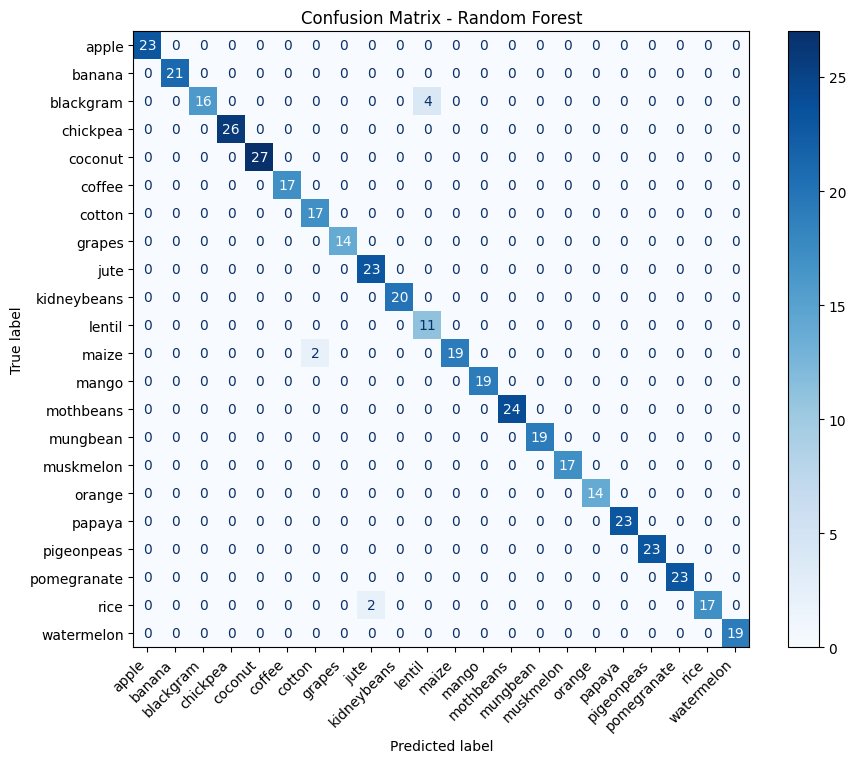

In [ ]:
from sklearn.metrics import classification_report

# Train Final Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

# Print Final Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Final Model Accuracy (Random Forest): {accuracy:.4f}")

# Print Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot Confusion Matrix for Final Model
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test, ax=ax, cmap=plt.cm.Blues, display_labels=label_encoder.classes_)
plt.xticks(rotation=45, ha="right")
plt.title("Confusion Matrix - Random Forest")
plt.show()

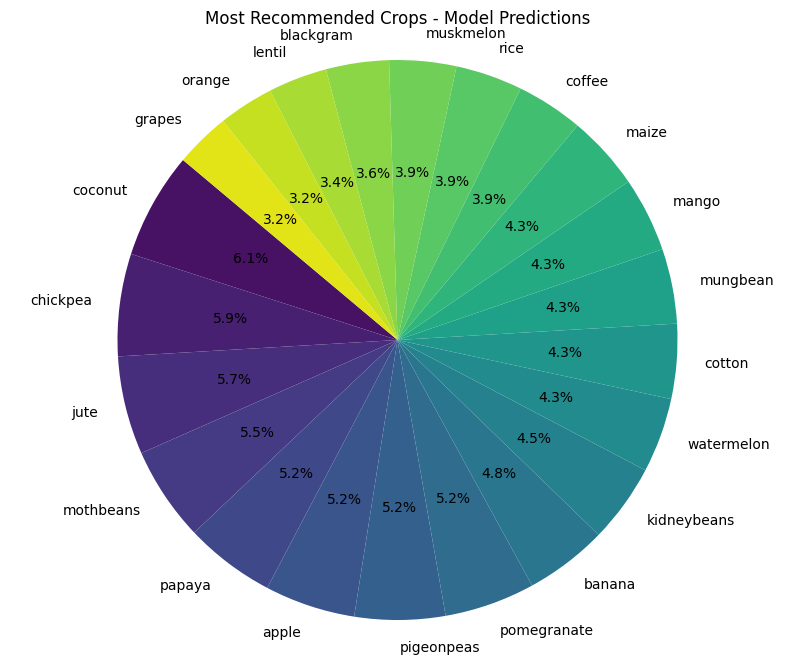

In [ ]:
import matplotlib.pyplot as plt

# Predict crops using the trained Random Forest model
y_pred = rf_model.predict(x_test)

# Convert encoded predictions back to crop names
predicted_crops = label_encoder.inverse_transform(y_pred)

# Count occurrences of each predicted crop
crop_counts = pd.Series(predicted_crops).value_counts()

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(crop_counts)))
plt.title("Most Recommended Crops - Model Predictions")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


# Predicting System

In [ ]:
import numpy as np
import pandas as pd

# Function to take user input and predict crop using the trained model
def recommend_crop():
    print("\n🌱 Enter the following values for crop recommendation 🌱\n")

    try:
        # Take user input
        N = float(input("Nitrogen (N): "))
        P = float(input("Phosphorus (P): "))
        K = float(input("Potassium (K): "))
        temperature = float(input("Temperature (°C): "))
        humidity = float(input("Humidity (%): "))
        ph = float(input("pH Level: "))
        rainfall = float(input("Rainfall (mm): "))

        # Create an array from user input
        user_input = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

        # Convert user input to DataFrame with correct column names
        user_input_df = pd.DataFrame(user_input, columns=x.columns)

        # Scale input using the trained StandardScaler
        user_input_scaled = scaler.transform(user_input_df)

        # Predict crop using the existing trained model (rf_model)
        predicted_label = rf_model.predict(user_input_scaled)
        crop = label_encoder.inverse_transform(predicted_label)[0]

        print(f"\n✅ Recommended Crop: **{crop}** 🌾")

    except ValueError:
        print("\n❌ Invalid input! Please enter numerical values only.")

# Call the function to test (uncomment below to run in an interactive environment)
recommend_crop()



🌱 Enter the following values for crop recommendation 🌱

Nitrogen (N): 10
Phosphorus (P): 20
Potassium (K): 30
Temperature (°C): 35
Humidity (%): 60
pH Level: 6.5
Rainfall (mm): 200

✅ Recommended Crop: **mango** 🌾


In [ ]:
data = crop

In [ ]:
from sklearn.cluster import KMeans

# Prepare Data for Clustering
companion_data = data.drop(['crop'], axis=1)
crop_labels = data['crop']

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)  # Adjust clusters based on dataset
kmeans.fit(companion_data)

# Assign cluster labels
data['cluster'] = kmeans.labels_

# Function to recommend companion crops
def recommend_companion(crop_name):
    cluster_id = data[data['crop'] == crop_name]['cluster'].values[0]
    companion_crops = data[data['cluster'] == cluster_id]['crop'].unique()
    companions = [crop for crop in companion_crops if crop != crop_name]
    return companions

# Example Usage
crop_to_check = 'rice'
print(f"Companion crops for {crop_to_check}: {recommend_companion(crop_to_check)}")


Companion crops for rice: ['pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


In [ ]:
import pickle

# Save the trained model
with open('/content/crop_recommendation_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print("✅ Model saved at: /content/crop_recommendation_model.pkl")

from google.colab import files
files.download('/content/crop_recommendation_model.pkl')

✅ Model saved at: /content/crop_recommendation_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Save the trained scaler
with open('scaler1.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Download the scaler file
from google.colab import files
files.download('scaler1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Yield Prediction Model**



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Load dataset
crop_data = pd.read_csv("/content/drive/MyDrive/crop_production.csv")

# Normalize Crop names
crop_data['Crop'] = crop_data['Crop'].str.lower()
crop_data['Crop'] = crop_data['Crop'].replace(
    ['moth', 'peas  (vegetable)', 'bean', 'moong(green gram)', 'pome granet',
     'water melon', 'cotton(lint)', 'gram'],
    ['mothbeans', 'pigeonpeas', 'kidneybeans', 'mungbean', 'pomegranate',
     'watermelon', 'cotton', 'chickpea'])

# Filter for specific crops
selected_crops = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
                  'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
                  'banana', 'mango', 'grapes', 'watermelon', 'apple',
                  'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
crop_data = crop_data[crop_data['Crop'].isin(selected_crops)]

# Drop unnecessary columns
crop_data = crop_data.drop(['State_Name', 'District_Name'], axis=1)

In [ ]:
crop_data.shape

(58461, 5)

In [ ]:
crop_data.head()

,Crop_Year,Season,Crop,Area,Production
2,2000,Kharif,rice,102.0,321.00
3,2000,Whole Year,banana,176.0,641.00
12,2001,Kharif,rice,83.0,300.00
18,2002,Kharif,rice,189.2,510.84
20,2002,Whole Year,banana,213.0,1278.00


In [ ]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58461 entries, 2 to 246089
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crop_Year   58461 non-null  int64  
 1   Season      58461 non-null  object 
 2   Crop        58461 non-null  object 
 3   Area        58461 non-null  float64
 4   Production  57565 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
crop_data.describe()

,Crop_Year,Area,Production
count,58461.000000,58461.000000,5.756500e+04
mean,2005.755119,21056.352565,4.596474e+04
std,5.018032,48398.529629,1.275836e+05
min,1997.000000,1.000000,0.000000e+00
25%,2002.000000,154.000000,1.890000e+02
50%,2006.000000,1800.000000,2.958000e+03
75%,2010.000000,15370.000000,2.670100e+04
max,2015.000000,687000.000000,2.589591e+06


In [ ]:
crop_data.columns

Index(['Crop_Year', 'Season', 'Crop', 'Area', 'Production'], dtype='object')

In [ ]:
crop_data.isnull().sum()

,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,896


In [ ]:
crop_data.duplicated().sum()

2072

In [ ]:
# Handle missing values
crop_data = crop_data.dropna()

In [ ]:
# Encode categorical features
label_encoders = {}
categorical_cols = ['Season', 'Crop']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    crop_data[col] = label_encoders[col].fit_transform(crop_data[col])

<ipython-input-92-f56e9066773e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data[col] = label_encoders[col].fit_transform(crop_data[col])
<ipython-input-92-f56e9066773e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data[col] = label_encoders[col].fit_transform(crop_data[col])


In [ ]:
# Define features and target variable
X = crop_data.drop(["Production"], axis=1)
y = crop_data["Production"]

In [ ]:
X

,Crop_Year,Season,Crop,Area
2,2000,1,18,102.0
3,2000,4,1,176.0
12,2001,1,18,83.0
18,2002,1,18,189.2
20,2002,4,1,213.0
...,...,...,...,...
246072,2014,2,3,198.0
246078,2014,2,13,64.0
246085,2014,3,10,325.0
246086,2014,3,18,306.0


In [ ]:
y

,Production
2,321.00
3,641.00
12,300.00
18,510.84
20,1278.00
...,...
246072,203.00
246078,40.00
246085,2039.00
246086,801.00


In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
### ------------------- RANDOM FOREST REGRESSOR -------------------
print("Training Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluation Metrics
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("\nRandom Forest Results:")
print(f"  R2 Score: {rf_r2:.4f}")
print(f"  Mean Absolute Error: {rf_mae:.2f}")
print(f"  Root Mean Squared Error: {rf_rmse:.2f}")

# # Cross-validation
# rf_cv = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='r2').mean()
# print(f"  Cross-validation R2: {rf_cv:.4f}")
# print("-" * 50)

Training Random Forest Regressor...

Random Forest Results:
  R2 Score: 0.8474
  Mean Absolute Error: 16330.54
  Root Mean Squared Error: 50668.44


In [ ]:
### ------------------- DECISION TREE REGRESSOR -------------------
print("Training Decision Tree Regressor...")
dt_model = DecisionTreeRegressor(random_state=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Evaluation Metrics
dt_r2 = r2_score(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

print("\nDecision Tree Results:")
print(f"  R2 Score: {dt_r2:.4f}")
print(f"  Mean Absolute Error: {dt_mae:.2f}")
print(f"  Root Mean Squared Error: {dt_rmse:.2f}")

Training Decision Tree Regressor...

Decision Tree Results:
  R2 Score: 0.6983
  Mean Absolute Error: 20868.70
  Root Mean Squared Error: 71248.21


<ipython-input-100-98583648cf5a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette="coolwarm")


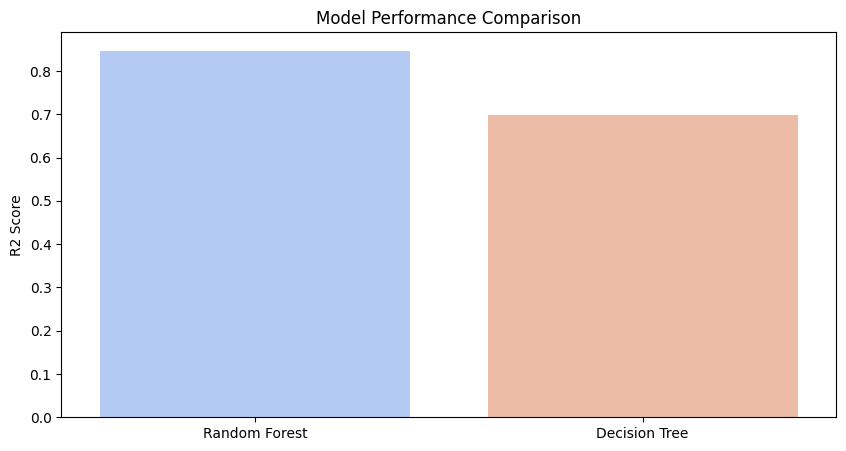

In [ ]:
# Visualizing performance
models = ["Random Forest", "Decision Tree"]
r2_scores = [rf_r2, dt_r2]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=r2_scores, palette="coolwarm")
plt.ylabel("R2 Score")
plt.title("Model Performance Comparison")
plt.show()

PREDECTING SYSTEM


In [ ]:
# Remove spaces from stored label classes
label_encoders['Season'].classes_ = np.array([s.strip() for s in label_encoders['Season'].classes_])
label_encoders['Crop'].classes_ = np.array([c.strip() for c in label_encoders['Crop'].classes_])

def predict_yield():
    # Take user inputs
    crop_year = int(input("Enter Crop Year (e.g., 2024): "))
    season = input("Enter Season (e.g., Kharif, Rabi, Summer, Whole Year): ").strip()
    crop = input("Enter Crop Name (e.g., Rice, Maize, Wheat): ").strip().lower()
    area = float(input("Enter Area in hectares: "))

    # Validate inputs
    if season not in label_encoders['Season'].classes_:
        print(f"❌ Error: '{season}' is not a valid season!")
        print(f"✅ Available options: {list(label_encoders['Season'].classes_)}")
        return

    if crop not in label_encoders['Crop'].classes_:
        print(f"❌ Error: '{crop}' is not a valid crop!")
        print(f"✅ Available options: {list(label_encoders['Crop'].classes_)}")
        return

    # Encode categorical variables
    season_encoded = label_encoders['Season'].transform([season])[0]
    crop_encoded = label_encoders['Crop'].transform([crop])[0]

    # Prepare input data
    input_data = np.array([[crop_year, season_encoded, crop_encoded, area]])

    # Standardize input
    input_scaled = scaler.transform(input_data)

    # Predict yield
    predicted_yield = rf_model.predict(input_scaled)
    print(f"\n🌾 Estimated Crop Production: {predicted_yield[0]:.2f} metric tons")

# Run prediction system
predict_yield()


Enter Crop Year (e.g., 2024): 2024
Enter Season (e.g., Kharif, Rabi, Summer, Whole Year): Rabi
Enter Crop Name (e.g., Rice, Maize, Wheat): rice
Enter Area in hectares: 500

🌾 Estimated Crop Production: 851.35 metric tons


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

# Save the trained model
with open('/content/yield_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print("✅ Model saved at: /content/yield_prediction_model.pkl")
from google.colab import files
files.download('/content/yield_prediction_model.pkl')

✅ Model saved at: /content/yield_prediction_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Save the trained scaler
with open('scaler2.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Download the scaler file
from google.colab import files
files.download('scaler2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>